In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [21]:
tickers = ['AAPL', 'MSFT', 'GOOGl', 'NVDA']
returns_df = pd.DataFrame()

for ticker in tickers:
    df = yf.download(ticker, start = '2020-01-01', end = '2024-12-31')[['Close']]
    df.columns = ['ticker']
    df = df.pct_change()
    returns_df = pd.concat([returns_df, df], axis = 1)

returns_df.dropna(inplace=True)
returns_df.head()

C:\Users\Alqama\AppData\Local\Temp\ipykernel_24036\1599804754.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start = '2020-01-01', end = '2024-12-31')[['Close']]
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_24036\1599804754.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start = '2020-01-01', end = '2024-12-31')[['Close']]
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_24036\1599804754.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start = '2020-01-01', end = '2024-12-31')[['Close']]
[*********************100%***********************]  1 of 1 completed
C:\Users\Alqama\AppData\Local\Temp\ipykernel_24036\1599804754.py:5: FutureWarning: YF.download() has changed argume

,ticker,ticker,ticker,ticker
Date,,,,
2020-01-03,-0.009722,-0.012452,-0.005231,-0.016006
2020-01-06,0.007968,0.002585,0.026654,0.004194
2020-01-07,-0.004703,-0.009118,-0.001932,0.012107
2020-01-08,0.016086,0.015929,0.007118,0.001876
2020-01-09,0.021241,0.012493,0.010498,0.010983


In [42]:
# mean variance optimizer using CVXPY
import cvxpy as cp

def optimize_portfolio(returns, risk_aversion = 1.0):
    mu = returns.mean().values         # Convert to NumPy array
    cov = returns.cov().values         # Convert to NumPy array
    n = len(mu)

    w = cp.Variable(n)
    objective  = cp.Maximize(mu.T @ w - risk_aversion * cp.quad_form(w, cov))
    constraints = [cp.sum(w) == 1, w >= 0]
    problem = cp.Problem(objective, constraints)
    problem.solve(solver = cp.SCS)

    return pd.Series(w.value, index = returns.columns)

def equal_weight_portfolio(returns):
    n = returns.shape[1]
    return pd.Series([1/n] * n, index = returns.columns) 

In [44]:
opt_weights = optimize_portfolio(returns_df, risk_aversion = 0.5)
print(opt_weights)

ticker    0.000014
ticker    0.000014
ticker    0.000014
ticker    0.999957
dtype: float64


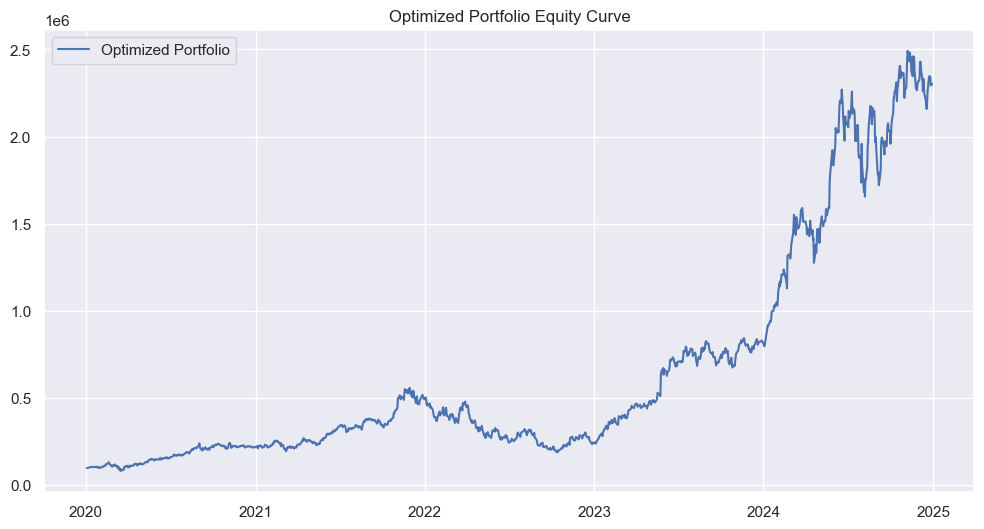

In [46]:
portfolio_returns = (returns_df * opt_weights).sum(axis=1)
equity_curve = 100_000 * (1 + portfolio_returns).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(equity_curve, label='Optimized Portfolio')
plt.title("Optimized Portfolio Equity Curve")
plt.legend()
plt.show()